# WRF-Chem Post Processing
Project: **Simulation of Tropospheric Ozone Formation in the Metropolitan Region of São Paulo under Climate Change Scenarios**

**University of São Paulo**
***
Developed by Alejandro Delgado

Type: Master's Dissertation
***

## Map Model Domain of MASP
Import geographical data generated by `WRF Preprocessor System (WPS)`, such as `geo_em.d01.nc` and `geo_em.d02.nc`. These represent two nested domains:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap
import cartopy
from cartopy import crs # becareful with this package, doesn't work well
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import OCEAN
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords
import wrf

In [2]:
geo_d01 = Dataset('../3_Modeling/geo_em.d01.nc')
geo_d02 = Dataset('../3_Modeling/geo_em.d02.nc')

When we write in the terminal `ncdump`, we can verify the name of terrain height, units are in meters: 

```bash
% ncdump -h geo_em.d01.nc

netcdf geo_em.d01 {
dimensions:
...
	float HGT_M(Time, south_north, west_east) ;
		HGT_M:FieldType = 104 ;
		HGT_M:MemoryOrder = "XY " ;
		HGT_M:units = "meters MSL" ;
		HGT_M:description = "GMTED2010 30-arc-second topography height" ;
		HGT_M:stagger = "M" ;
		HGT_M:sr_x = 1 ;
		HGT_M:sr_y = 1 ;
```

In [3]:
hgt_d01    = getvar(geo_d01, 'HGT_M')
hgt_d02    = getvar(geo_d02, 'HGT_M')
cart_proj  = get_cartopy(hgt_d01)
lats, lons = latlon_coords(hgt_d01)
lats_d02, lons_d02 = latlon_coords(hgt_d02)
xlim_d01   = wrf.cartopy_xlim(hgt_d01)
ylim_d01   = wrf.cartopy_ylim(hgt_d01)
xlim_d02   = wrf.cartopy_xlim(hgt_d02)
ylim_d02   = wrf.cartopy_ylim(hgt_d02)

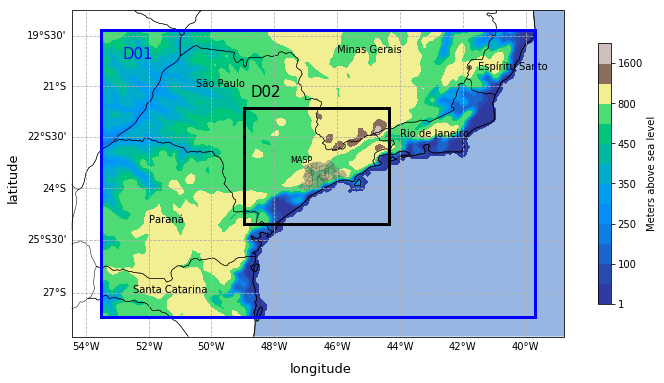

In [4]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = plt.axes(projection=cart_proj)
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')

ax1.add_feature(states, linewidth=.5,edgecolor='black')
ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines('50m', linewidth=0.8)

# ad MASP
fname = '../3_Modeling/MunRM07.shp'

shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                crs.PlateCarree(), edgecolor='black')
ax1.add_feature(shape_feature, linewidth=0.2, edgecolor = 'black', 
                facecolor = 'gray', alpha=0.5)

ax1.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, 
             xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax1.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, 
             ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax1.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), 
                                   xlim_d01[1]-xlim_d01[0], 
                                   ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax1.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, 
        ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 
        'D01', size=15, color='blue', zorder=10)
 
# d02 box
ax1.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), 
                                   xlim_d02[1]-xlim_d02[0], 
                                   ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax1.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, 
        ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 
        'D02', size=15, color='black', zorder=10)

# Set the contour levels
#levels = numpy.arange(0, 2500., 250.)
levels = [1, 50, 100, 200, 250, 300, 
          350, 400, 450, 500, 800, 1300, 
          1600, 2000]

plt.contourf(to_np(lons), to_np(lats), 
                to_np(hgt_d01), levels=levels,
                transform=crs.PlateCarree(),
                cmap=get_cmap("terrain"), alpha = 1)
# ax.set_title('WRF nested domain setup', size=20)

# draw gridlines
gl = ax1.gridlines(draw_labels=True, dms=True, alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

# States of Southeastern of Brazil
ax1.text(-52.5, -27, 'Santa Catarina', transform=crs.Geodetic(),
       fontsize=10)
ax1.text(-52, -25, 'Paraná', transform=crs.Geodetic(),
       fontsize=10)
ax1.text(-50.5, -21, 'São Paulo', transform=crs.Geodetic(), 
        fontsize=10)
ax1.text(-47.5, -23.25, 'MASP', transform=crs.Geodetic(), 
        fontsize=8)
ax1.text(-46, -20, 'Minas Gerais', transform=crs.Geodetic(), 
        fontsize=10)
ax1.text(-44, -22.5, 'Rio de Janeiro', transform=crs.Geodetic(), 
        fontsize=10)
ax1.text(-41.5, -20.5, 'Espíritu Santo', transform=crs.Geodetic(), 
        fontsize=10)
ax1.text(-56.5, -23.25, 'latitude', transform=crs.Geodetic(),
         fontsize=13, rotation='vertical')
ax1.text(-47.5, -29.25, 'longitude', transform=crs.Geodetic(),
        fontsize=13, rotation='horizontal')
# Add a color bar. The shrink often needs to be set 
# by trial and error.
plt.colorbar(ax=ax1, label = 'Meters above sea level',shrink=0.8,
            pad = 0.05 );

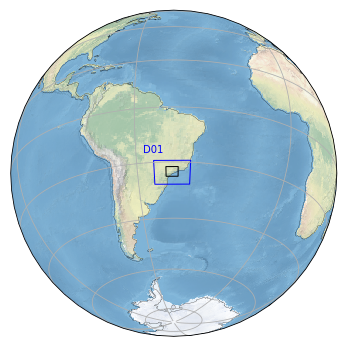

In [5]:
fig2 = plt.figure(figsize=(6, 6))
ax2 = plt.axes(projection=crs.Orthographic(
                        central_latitude=-24,
                        central_longitude=-46))
ax2.coastlines(resolution='110m', linewidth=0.25)
ax2.add_feature(cartopy.feature.OCEAN, zorder=0)
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

# D01
from collections import namedtuple
from shapely import geometry
Region = namedtuple('Region',
                   field_names=['region_name',
                                'lonmin','lonmax','latmin','latmax'])
sub_region =  Region(
    region_name="D01",
    latmin = lats.min().values,
    latmax = lats.max().values,
    lonmin = lons.min().values,
    lonmax = lons.max().values)

sub_region_d02 =  Region(
    region_name="D02",
    latmin = lats_d02.min().values,
    latmax = lats_d02.max().values,
    lonmin = lons_d02.min().values,
    lonmax = lons_d02.max().values)

def add_sub_region_box(ax, subregion, edgecolor='black'):
    """ """
    geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)
    ax2.add_geometries([geom], crs=crs.PlateCarree(), alpha=1,edgecolor=edgecolor, facecolor = 'none')
    return ax

add_sub_region_box(ax2, sub_region, edgecolor='blue')
add_sub_region_box(ax2, sub_region_d02, edgecolor='black')
ax2.text(-12*1E5,80*1E4, # choice numbers
        'D01', size=10, color='blue', zorder=10)
ax2.stock_img()
ax2.gridlines();

In [6]:
fig1.savefig("../4_Draft_Report/Dissertation/fig/domain_area.pdf",bbox_inches='tight');
fig2.savefig("../4_Draft_Report/Dissertation/fig/world_area.pdf",bbox_inches='tight')